# Laboratorio 6 
Integrantes: 
- Francis Aguilar 
- Angela Garcia 
- Cesar Lopez

In [132]:
import pandas as pd
import unicodedata
import string
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx

import community as community_louvain 
import collections

# ----- Análisis de tópicos con LDA (sklearn) -----
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


## Descripcion general de los datos

In [133]:
import json
import pandas as pd

# cada linea es un json
with open("tioberny.txt", "r", encoding="utf-16") as f:
    data = [json.loads(line) for line in f]

# no todas las lineas tienen la misma informacion 
df = pd.DataFrame(data)


In [134]:
print("RESUMEN DEL DATAFRAME")
print("="*40)
    
# Dimensiones
print(f"Total de filas: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}\n")

RESUMEN DEL DATAFRAME
Total de filas: 5019
Total de columnas: 32



In [135]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5019 non-null   int64  
 1   id_str               5019 non-null   object 
 2   url                  5019 non-null   object 
 3   date                 5019 non-null   object 
 4   user                 5019 non-null   object 
 5   lang                 5019 non-null   object 
 6   rawContent           5019 non-null   object 
 7   replyCount           5019 non-null   int64  
 8   retweetCount         5019 non-null   int64  
 9   likeCount            5019 non-null   int64  
 10  quoteCount           5019 non-null   int64  
 11  bookmarkedCount      5019 non-null   int64  
 12  conversationId       5019 non-null   int64  
 13  conversationIdStr    5019 non-null   object 
 14  hashtags             5019 non-null   object 
 15  cashtags             5019 non-null   o

id                        0
id_str                    0
url                       0
date                      0
user                      0
lang                      0
rawContent                0
replyCount                0
retweetCount              0
likeCount                 0
quoteCount                0
bookmarkedCount           0
conversationId            0
conversationIdStr         0
hashtags                  0
cashtags                  0
mentionedUsers            0
links                     0
viewCount                81
retweetedTweet         5019
quotedTweet            4724
place                  4995
coordinates            5019
inReplyToTweetId        743
inReplyToTweetIdStr     743
inReplyToUser           649
source                    0
sourceUrl                 0
sourceLabel               0
media                     0
card                   4969
_type                     0
dtype: int64

In [136]:
df.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


In [137]:
# Identificar columnas con datos no hashables (listas o diccionarios)
columnas_no_hashable = [col for col in df.columns 
                       if df[col].apply(lambda x: isinstance(x, (list, dict))).any()]
print(columnas_no_hashable)


['user', 'hashtags', 'cashtags', 'mentionedUsers', 'links', 'quotedTweet', 'place', 'inReplyToUser', 'media', 'card']


In [138]:
# Crear un nuevo DataFrame con solo las columnas no hashables
df_no_hashable = df[columnas_no_hashable]
df_no_hashable.head()

,user,hashtags,cashtags,mentionedUsers,links,quotedTweet,place,inReplyToUser,media,card
0,"{'id': 1435062946598694914, 'id_str': '1435062...",[],[],"[{'id': 23664866, 'id_str': '23664866', 'usern...",[],"{'id': 1834252464092069901, 'id_str': '1834252...",None,None,"{'photos': [], 'videos': [], 'animated': []}",None
1,"{'id': 956650778634145792, 'id_str': '95665077...","[URGENTE, faferos, BernardoArévalo, NebajQuich...",[],[],[],None,None,None,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None
2,"{'id': 1087057038755143680, 'id_str': '1087057...",[],[],"[{'id': 77653794, 'id_str': '77653794', 'usern...",[],None,None,"{'id': 77653794, 'id_str': '77653794', 'userna...","{'photos': [], 'videos': [], 'animated': []}",None
3,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",[],[],"[{'id': 77653794, 'id_str': '77653794', 'usern...",[],None,None,"{'id': 77653794, 'id_str': '77653794', 'userna...","{'photos': [], 'videos': [], 'animated': []}",None
4,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",[],[],"[{'id': 945378369818058752, 'id_str': '9453783...",[],None,None,None,{'photos': [{'url': 'https://pbs.twimg.com/med...,None


In [139]:
# Filas duplicadas considerando solo columnas hashables
duplicados = df.drop(columns=columnas_no_hashable).duplicated()

print(f"Cantidad de filas duplicadas (ignorando columnas no hashables): {duplicados.sum()}")

Cantidad de filas duplicadas (ignorando columnas no hashables): 60


In [140]:
df["id_str_from_int"] = df["id"].astype(str)
df["id_match"] = df["id_str_from_int"] == df["id_str"]

# Ver cuántos no coinciden
no_coinciden = df[~df["id_match"]]
print(f"Total de filas que NO coinciden: {len(no_coinciden)}")


Total de filas que NO coinciden: 0


## Limpieza y preprocesamiento de datos

##### Id
Quitamos la columna de id, ya validamos que todas las columnas de id y id_str coinciden y tenían exactamente los mismos valores. Para simplificar un poco nuestros datos, eliminamos una de las columnas, tambien eliminamos las columnas que creamos antes para identificar que lo anterior era cierto. 

In [141]:
df = df.drop(columns = ["id_str_from_int", "id_match", "id"])

In [142]:
print(df["id_str"].nunique())

4944


In [143]:
df[df["id_str"].duplicated(keep=False)]

,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
11,1834276403224973546,https://x.com/GuatemalaGob/status/183427640322...,2024-09-12 17:02:28+00:00,"{'id': 495102115, 'id_str': '495102115', 'url'...",es,🔴 | El presidente @BArevalodeLeon participa e...,1,7,12,4,...,None,NaN,None,None,"<a href=""https://periscope.tv"" rel=""nofollow"">...",https://periscope.tv,Periscope,"{'photos': [], 'videos': [], 'animated': []}",{'title': '🔴 | El presidente @BArevalodeLeon p...,snscrape.modules.twitter.Tweet
22,1834276403224973546,https://x.com/GuatemalaGob/status/183427640322...,2024-09-12 17:02:28+00:00,"{'id': 495102115, 'id_str': '495102115', 'url'...",es,🔴 | El presidente @BArevalodeLeon participa e...,1,7,12,4,...,None,NaN,None,None,"<a href=""https://periscope.tv"" rel=""nofollow"">...",https://periscope.tv,Periscope,"{'photos': [], 'videos': [], 'animated': []}",{'title': '🔴 | El presidente @BArevalodeLeon p...,snscrape.modules.twitter.Tweet
100,1834096806294073461,https://x.com/arronchopa/status/18340968062940...,2024-09-12 05:08:49+00:00,"{'id': 936775775977721856, 'id_str': '93677577...",es,Que ARAÑA este tipo 10 pts bolsas llegó a dar ...,38,102,197,13,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
187,1834021254346522755,https://x.com/XelaNewsGt/status/18340212543465...,2024-09-12 00:08:36+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,"#URGENTE Captan a otro funcionario de la ""nuev...",47,211,435,14,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
237,1834058400319132028,https://x.com/vozdeltuit/status/18340584003191...,2024-09-12 02:36:12+00:00,"{'id': 56183126, 'id_str': '56183126', 'url': ...",es,#URGENTE El Estor. Efectivos militares @Ejerc...,42,161,361,18,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,1832156379836039476,https://x.com/wjmartinv/status/183215637983603...,2024-09-06 20:38:15+00:00,"{'id': 910705873206562821, 'id_str': '91070587...",es,Quizá lo que no entendimos es que iban a revis...,108,251,576,51,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
4874,1832156379836039476,https://x.com/wjmartinv/status/183215637983603...,2024-09-06 20:38:15+00:00,"{'id': 910705873206562821, 'id_str': '91070587...",es,Quizá lo que no entendimos es que iban a revis...,108,251,576,51,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
4954,1832410696765628486,https://x.com/ElQueNews/status/183241069676562...,2024-09-07 13:28:49+00:00,"{'id': 1245558419588894720, 'id_str': '1245558...",es,#URGENTE Sigue creciendo el descontento socia...,68,66,179,7,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
4956,1831905423475298308,https://x.com/YoelDeLeon23/status/183190542347...,2024-09-06 04:01:02+00:00,"{'id': 1743805087326113794, 'id_str': '1743805...",es,No hay dinero para atender y contrarrestar

##### URL
Validamos que todos los url de la columna de url sean validos y empiecen con la estructura https://x.com/, ya que todos tienen que ser links de x 

In [144]:

df["is_valid_x"] = df["url"].astype(str).str.startswith("https://x.com/")

# Verificar si todos cumplen
all_valid = df["is_valid_x"].all()
print("¿Todos empiezan con https://x.com/?:", all_valid)
# eliminamos esta columna que ayudo a la validacion
df = df.drop(columns = ["is_valid_x"])

¿Todos empiezan con https://x.com/?: True


##### Date
Para esta columna lo que queremos validar es que todos sean de tipo fecha. 

In [145]:
print(df["date"].apply(type).value_counts())

date
<class 'str'>    5019
Name: count, dtype: int64


In [146]:

def safe_to_datetime(x):
    try:
        return pd.to_datetime(x, dayfirst=True)
    except Exception:
        return x  # deja el valor original si falla

# Aplica la conversión segura
df["date"] = df["date"].apply(safe_to_datetime)

# Mostrar tipos de datos que quedaron
print(df["date"].apply(type).value_counts())


C:\Users\Francis\AppData\Local\Temp\ipykernel_3696\2882862283.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(x, dayfirst=True)


date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    5019
Name: count, dtype: int64


##### User
En base a la vista general de los datos logramos identificar que la columna de users tiene un json dentro, con más información específica sobre la información de la cuenta que está publicando. Para entender y separar mejor la información, se crea un nuevo df para visualizar la información de manera más ordenada. Adicional, en la columna user del df original, se remplaza por el nombre de usuario y se crea una columna adicional con el id_str del user llamada id_str_user

In [147]:
df_user = pd.json_normalize(df["user"])
df_user.head()

,id,id_str,url,username,displayname,rawDescription,created,followersCount,friendsCount,statusesCount,...,location,profileImageUrl,profileBannerUrl,protected,verified,blue,blueType,descriptionLinks,pinnedIds,_type
0,1435062946598694914,1435062946598694914,https://x.com/La_ReVoluZzion,La_ReVoluZzion,The_ReVoluZZzioN 🫡,"¡Defensor de los defensores de los DDHH, PRO-L...",2021-09-07 02:11:21+00:00,2102,531,51984,...,Cuba 🇨🇺,https://pbs.twimg.com/profile_images/174164660...,https://pbs.twimg.com/profile_banners/14350629...,None,False,False,None,[],[1758120995683012760],snscrape.modules.twitter.User
1,956650778634145792,956650778634145792,https://x.com/XelaNewsGt,XelaNewsGt,XelaNews,Noticias sin injerencias.,2018-01-25 22:11:34+00:00,3462,359,2915,...,Guatemala,https://pbs.twimg.com/profile_images/179560227...,https://pbs.twimg.com/profile_banners/95665077...,None,False,False,None,[],[],snscrape.modules.twitter.User
2,1087057038755143680,1087057038755143680,https://x.com/M24095273,M24095273,VIVAlafuenteDEtodaVIDA,CONCIENCIA TOTAL,2019-01-20 18:39:29+00:00,30,171,598,...,,https://pbs.twimg.com/profile_images/178224682...,https://pbs.twimg.com/profile_banners/10870570...,None,False,False,None,[],[],snscrape.modules.twitter.User
3,2881001877,2881001877,https://x.com/carlosalbesc,carlosalbesc,Carlos Alberto Escobar,,2014-11-17 13:58:10+00:00,11,218,4302,...,,https://abs.twimg.com/sticky/default_profile_i...,None,None,False,False,None,[],[],snscrape.modules.twitter.User
4,3013862206,3013862206,https://x.com/Brenda_AGN,Brenda_AGN,Brenda Lari,,2015-02-03 03:55:36+00:00,564,223,8707,...,Guatemala,https://pbs.twimg.com/profile_images/180418691...,https://pbs.twimg.com/profile_banners/30138622...,None,False,False,None,[],[],snscrape.modules.twitter.User


In [148]:
# Extraer solo el 'username' de cada diccionario
def obtener_username(user_dict):
    if isinstance(user_dict, dict):
        return user_dict.get("username")
    return None

# Extraer solo el 'id_str' de cada diccionario
def obtener_id_str(user_dict):
    if isinstance(user_dict, dict):
        return user_dict.get("id_str")
    return None

df["id_str_user"] = df["user"].apply(obtener_id_str)
df["user"] = df["user"].apply(obtener_username)

print(df[["user", "id_str_user"]].head())
df


             user          id_str_user
0  La_ReVoluZzion  1435062946598694914
1      XelaNewsGt   956650778634145792
2       M24095273  1087057038755143680
3    carlosalbesc           2881001877
4      Brenda_AGN           3013862206


,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type,id_str_user
0,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-12-09 17:21:03+00:00,La_ReVoluZzion,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1435062946598694914
1,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-12-09 15:27:20+00:00,XelaNewsGt,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet,956650778634145792
2,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-12-09 17:20:25+00:00,M24095273,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1087057038755143680
3,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-12-09 17:18:48+00:00,carlosalbesc,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,2881001877
4,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-12-09 17:16:42+00:00,Brenda_AGN,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet,3013862206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1832570119563743682,https://x.com/Benjamdc7/status/183257011956374...,2024-08-09 00:02:18+00:00,Benjamdc7,es,@marvgcaceres @diaco_gt @GuatemalaGob @vinicio...,0,0,0,0,...,1.832220e+18,1832219768331362527,"{'id': 196005322, 'id_str': '196005322', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1756407688060088320
5015,1832569640079270018,https://x.com/lfarivas/status/1832569640079270018,2024-08-09 00:00:24+00:00,lfarivas,es,@Soygeorgegt Lastima @BArevalodeLeon la gente ...,0,0,0,0,...,1.832082e+18,1832082118718939516,"{'id': 205009534, 'id_str': '205009534', 'user...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,266309394
5016,1832569563109896313,https://x.com/MynorAroldopab1/status/183256956...,2024-08-09 00:00:05+00:00,MynorAroldopab1,es,Alguien sabe si este precio es culpa de @BArev...,0,0,0,0,...,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet,816386114999226368
5017,1832568528508968963,https://x.com/extasisvgames/status/18325685285...,2024-07-09 23:55:59+00:00,extasisvgames,es,@guate_opina @BArevalodeLeon Y los diputados p...,0,0,1,0,...,1.832428e+18,1832428364147097629,"{'id': 821313911634984960, 'id_s

Validamos que todas las columnas tengan el valor de username que agregamos. Al ver que no hay valores nulos en ambas columnas, podemos validar que se realizó bien el proceso

In [149]:
# Contar valores nulos en la columna 'user'
nulos = df["user"].isnull().sum()
print(f"Cantidad de usuarios nulos: {nulos}")

nulos = df["id_str_user"].isnull().sum()
print(f"Cantidad de id usuarios nulos: {nulos}")

Cantidad de usuarios nulos: 0
Cantidad de id usuarios nulos: 0


In [150]:
# convertirlos en lowercase 
df["user"] = df["user"].str.lower()

In [151]:
# de igual manera es util saber cuantos valores unicos tenemos 
print(df["user"].nunique())

2620


##### rawContent
Acciones típicas: minúsculas, quitar URLs, menciones, hashtags, emojis, signos de puntuación, números y *stopwords*; normalizar `username` y deduplicar. También extraeremos menciones, respuestas y retweets sobre tio Berny.


In [152]:
import stopwordsiso as stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# SPANISH_STOPWORDS = set(stopwords.words('spanish'))
# SPANISH_STOPWORDS = stopwords.stopwords("es")

# definimos regex según acción por hacer. 
URL_RE = re.compile(r'https?://\S+|www\.\S+', re.IGNORECASE)
MENTION_RE = re.compile(r'@([A-Za-z0-9_]{1,15})')  # handle básico de X
HASHTAG_RE = re.compile(r'#(\w+)')
EMOJI_RE = re.compile(r'[\U00010000-\U0010ffff]', flags=re.UNICODE)
EXTRA_STOPWORDS = {"vos", "ud", "sos"}
SPANISH_STOPWORDS = set(stopwords.stopwords("es")).union(EXTRA_STOPWORDS)


def clean_text(text: str):
    if pd.isna(text):
        return ''
    t = text
    t = URL_RE.sub(' ', t)
    t = EMOJI_RE.sub(' ', t)
    t = t.lower()
    t = unicodedata.normalize('NFKD', t)
    t = ''.join(ch for ch in t if not unicodedata.combining(ch))
    t = t.translate(str.maketrans('', '', string.punctuation))
    t = re.sub(r'\d+', ' ', t)
    tokens = [w for w in re.findall(r'\b\w+\b', t) if w not in SPANISH_STOPWORDS]
    return ' '.join(tokens)

# si empieza con "rt" lo marca como retweet. 
def is_retweet(text: str):
    return bool(re.match(r'^\s*rt\s*@', str(text).lower()))

# si empieza con "@usuario" lo marca como reply. 
def is_reply(text: str):
    return bool(re.match(r'^\s*@', str(text).lower()))

df['tweet_text_clean'] = df['rawContent'].map(clean_text)
df['is_retweet'] = df['rawContent'].map(is_retweet)
df['is_reply'] = df['rawContent'].map(is_reply)

# Eliminar duplicados por texto y usuario en el mismo instante
df = df.drop_duplicates(subset=['user','id_str_user','rawContent','date']).reset_index(drop=True)
df.head()

,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,source,sourceUrl,sourceLabel,media,card,_type,id_str_user,tweet_text_clean,is_retweet,is_reply
0,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-12-09 17:21:03+00:00,la_revoluzzion,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1435062946598694914,confirmado companeres impuesto usembassyguate ...,False,False
1,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-12-09 15:27:20+00:00,xelanewsgt,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet,956650778634145792,urgente medios faferos informaron acerca visit...,False,False
2,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-12-09 17:20:25+00:00,m24095273,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1087057038755143680,ivanduque barevalodeleon usaste pegasus espiar...,False,True
3,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-12-09 17:18:48+00:00,carlosalbesc,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,2881001877,ivanduque barevalodeleon entienden cuadrando p...,False,True
4,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-12-09 17:16:42+00:00,brenda_agn,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet,3013862206,presidente barevalodeleon vicepresidenta karin...,False,False


Verificamos cuantos registros tenemos ahora que quitamos los duplicados 

In [153]:
print(df.shape)  

(4944, 35)


##### Hashtags
Los hashtags están en una lista, vamos a recorrerlas y convertirlos en lowerCase 

In [154]:
# Función para convertir a minúsculas
def convertir_hashtags(lista):
    if isinstance(lista, list):          # si es una lista
        nueva_lista = []
        for h in lista:
            nueva_lista.append(h.lower())  # convierte cada hashtag
        return nueva_lista
    else:
        return lista  

df["hashtags"] = df["hashtags"].apply(convertir_hashtags)


In [155]:
df.head()

,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,source,sourceUrl,sourceLabel,media,card,_type,id_str_user,tweet_text_clean,is_retweet,is_reply
0,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-12-09 17:21:03+00:00,la_revoluzzion,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1435062946598694914,confirmado companeres impuesto usembassyguate ...,False,False
1,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-12-09 15:27:20+00:00,xelanewsgt,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet,956650778634145792,urgente medios faferos informaron acerca visit...,False,False
2,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-12-09 17:20:25+00:00,m24095273,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1087057038755143680,ivanduque barevalodeleon usaste pegasus espiar...,False,True
3,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-12-09 17:18:48+00:00,carlosalbesc,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,2881001877,ivanduque barevalodeleon entienden cuadrando p...,False,True
4,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-12-09 17:16:42+00:00,brenda_agn,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet,3013862206,presidente barevalodeleon vicepresidenta karin...,False,False


##### Cashtags

In [156]:
# Validar si todas las listas están vacías o son None
todas_vacias = df["cashtags"].apply(lambda x: (isinstance(x, list) and len(x) == 0) or pd.isna(x)).all()

if todas_vacias:
    df = df.drop(columns=["cashtags"])
    print("La columna no tiene datos, se eliminó")
else:
    print("La columna tiene datos, no se eliminó")


La columna tiene datos, no se eliminó


In [157]:
# Función para saber si un valor NO es una lista vacía
def no_esta_vacia(valor):
    if isinstance(valor, list):
        return len(valor) > 0   # True si la lista tiene elementos
    else:
        return not pd.isna(valor)  

# Filtrar y mostrar solo los datos que cumplen
no_vacias = df[df["cashtags"].apply(no_esta_vacia)]
print(no_vacias["cashtags"])

269     [u]
2080    [O]
Name: cashtags, dtype: object


Se validó que la columna de cashtags si tuviera valores, después de ver que no se podía eliminar la columna, porque tenía filas en donde la lista tenía datos, se buscó ver que tipo de datos tenía. Solo son 2 valores los que tienen datos, por lo que se decide de igual manera eliminar esta columna. 

In [158]:
df = df.drop(columns=["cashtags"])

##### mentionedUsers
Con la columna de mentionedUsers evaluamos que es una lista de json con toda la información de los usuarios que son tagueados en el texto. Podemos hacer una lista sola con los ids para facilitar en el futuro las relaciones y guarar la información en otro df. 

In [159]:
# antes de hacer cualquier alteracion, guardamos los json en un df diferente

usuarios_mencionados = []

# Recorrer cada fila y agregar cada usuario mencionado a la lista
for _, row in df.iterrows():
    tweet_id = row["id_str"]
    autor = row["id_str_user"]
    lista = row["mentionedUsers"]
    
    if isinstance(lista, list):
        for u in lista:
            nuevo = u.copy()
            nuevo["tweet_id"] = tweet_id
            nuevo["autor"] = autor
            usuarios_mencionados.append(nuevo)

df_usuarios_mencionados = pd.DataFrame(usuarios_mencionados)

In [160]:
df_usuarios_mencionados

,id,id_str,username,displayname,_type,tweet_id,autor
0,23664866,23664866,usembassyguate,US Embassy Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
1,1001171061831020545,1001171061831020545,48CantonesToto,48 Cantones Oficial,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
2,262691982,262691982,USAIDGuate,USAID Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
3,1362391326,1362391326,UEGuatemala,Unión Europea en Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
4,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
...,...,...,...,...,...,...,...
17237,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1832568528508968963,725073085
17238,1245558419588894720,1245558419588894720,ElQueNews,El Quetzal News,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17239,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17240,1686220534114103296,1686220534114103296,lucreciapeinado,Lucrecia Peinado,snscrape.modules.twitter.UserRef,1832567980749660272,137470585


In [161]:
def extraer_usernames(lista):
    if isinstance(lista, list):
        return [d["username"].lower() for d in lista if "username" in d]
    return []

def extraer_usernamesID(lista):
    if isinstance(lista, list):
        return [d["id_str"].lower() for d in lista if "username" in d]
    return []

df["mentionedUsersId"] = df["mentionedUsers"].apply(extraer_usernamesID)
df["mentionedUsers"] = df["mentionedUsers"].apply(extraer_usernames)

In [162]:
df.head()

,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,...,sourceUrl,sourceLabel,media,card,_type,id_str_user,tweet_text_clean,is_retweet,is_reply,mentionedUsersId
0,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-12-09 17:21:03+00:00,la_revoluzzion,es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,0,...,http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1435062946598694914,confirmado companeres impuesto usembassyguate ...,False,False,"[23664866, 1001171061831020545, 262691982, 136..."
1,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-12-09 15:27:20+00:00,xelanewsgt,es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,15,...,https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet,956650778634145792,urgente medios faferos informaron acerca visit...,False,False,[]
2,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-12-09 17:20:25+00:00,m24095273,es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,0,...,https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,1087057038755143680,ivanduque barevalodeleon usaste pegasus espiar...,False,True,"[77653794, 945378369818058752]"
3,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-12-09 17:18:48+00:00,carlosalbesc,es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,0,...,http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet,2881001877,ivanduque barevalodeleon entienden cuadrando p...,False,True,"[77653794, 945378369818058752]"
4,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-12-09 17:16:42+00:00,brenda_agn,es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,0,...,http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet,3013862206,presidente barevalodeleon vicepresidenta karin...,False,False,"[945378369818058752, 407880186, 235332308, 357..."


##### Valores faltantes
Analizamos lo valores faltantes para ver que hacer con ellos. Depende si conviene eliminar la columna, rellenar los datos 

In [163]:
# esta se elimina ya que todos los datos son nulos
df = df.drop(columns = ["coordinates"])

In [164]:
df["retweetedTweet"] = df["retweetedTweet"].fillna(0)
df["viewCount"] = df["viewCount"].fillna(0)

C:\Users\Francis\AppData\Local\Temp\ipykernel_3696\2892399244.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["retweetedTweet"] = df["retweetedTweet"].fillna(0)


In [165]:
# Contar porcentaje de nulos
porcentaje_nulos = df["place"].isna().mean() * 100

print(f"Porcentaje de valores nulos en 'place': {porcentaje_nulos:.2f}%")

Porcentaje de valores nulos en 'place': 99.51%


place no nos puede dar mucha informacion porque casi no hay datos por lo que se decide eliminar la columna

In [166]:

df = df.drop(columns = ["place"])

##### Conversation Id


In [167]:
df["id_str_from_int"] = df["conversationId"].astype(str)
df["id_match"] = df["id_str_from_int"] == df["conversationIdStr"]

# Ver cuántos no coinciden
no_coinciden = df[~df["id_match"]]
print(f"Total de filas que NO coinciden: {len(no_coinciden)}")

Total de filas que NO coinciden: 0


In [168]:
df = df.drop(columns = ["id_str_from_int", "id_match", "conversationId"])

In [169]:
df["id_str_from_int"] = df["id_str"].astype(str)
df["id_match"] = df["id_str_from_int"] == df["conversationIdStr"]

# Ver cuántos no coinciden
no_coinciden = df[~df["id_match"]]
print(f"Total de filas que NO coinciden: {len(no_coinciden)}")

df = df.drop(columns = ["id_str_from_int", "id_match"])

Total de filas que NO coinciden: 4273


Se puede ver que las columnas de Conversation Id y str son las mismas, por lo que podemos eliminar las que son Integer y dejar unicamente la columna que es el Id Str. Luego evaluamos si la columna de conversationId es la misma que el ID. Podemos ver que la mayoría son diferentes por lo que se refieren a diferentes Ids y no deberíamos de proceder con eliminar ninguna de las columnas

##### Limpieza de los df de usuarios

In [170]:
df_user

,id,id_str,url,username,displayname,rawDescription,created,followersCount,friendsCount,statusesCount,...,location,profileImageUrl,profileBannerUrl,protected,verified,blue,blueType,descriptionLinks,pinnedIds,_type
0,1435062946598694914,1435062946598694914,https://x.com/La_ReVoluZzion,La_ReVoluZzion,The_ReVoluZZzioN 🫡,"¡Defensor de los defensores de los DDHH, PRO-L...",2021-09-07 02:11:21+00:00,2102,531,51984,...,Cuba 🇨🇺,https://pbs.twimg.com/profile_images/174164660...,https://pbs.twimg.com/profile_banners/14350629...,None,False,False,None,[],[1758120995683012760],snscrape.modules.twitter.User
1,956650778634145792,956650778634145792,https://x.com/XelaNewsGt,XelaNewsGt,XelaNews,Noticias sin injerencias.,2018-01-25 22:11:34+00:00,3462,359,2915,...,Guatemala,https://pbs.twimg.com/profile_images/179560227...,https://pbs.twimg.com/profile_banners/95665077...,None,False,False,None,[],[],snscrape.modules.twitter.User
2,1087057038755143680,1087057038755143680,https://x.com/M24095273,M24095273,VIVAlafuenteDEtodaVIDA,CONCIENCIA TOTAL,2019-01-20 18:39:29+00:00,30,171,598,...,,https://pbs.twimg.com/profile_images/178224682...,https://pbs.twimg.com/profile_banners/10870570...,None,False,False,None,[],[],snscrape.modules.twitter.User
3,2881001877,2881001877,https://x.com/carlosalbesc,carlosalbesc,Carlos Alberto Escobar,,2014-11-17 13:58:10+00:00,11,218,4302,...,,https://abs.twimg.com/sticky/default_profile_i...,None,None,False,False,None,[],[],snscrape.modules.twitter.User
4,3013862206,3013862206,https://x.com/Brenda_AGN,Brenda_AGN,Brenda Lari,,2015-02-03 03:55:36+00:00,564,223,8707,...,Guatemala,https://pbs.twimg.com/profile_images/180418691...,https://pbs.twimg.com/profile_banners/30138622...,None,False,False,None,[],[],snscrape.modules.twitter.User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1756407688060088320,1756407688060088320,https://x.com/Benjamdc7,Benjamdc7,Benja pAq,⚽️🏀⚾️🎱🎧🏎️ 🔴 csdmunicipal🔴,2024-02-10 20:00:39+00:00,10,140,392,...,,https://pbs.twimg.com/profile_images/178654453...,https://pbs.twimg.com/profile_banners/17564076...,None,False,False,None,[],[],snscrape.modules.twitter.User
5015,266309394,266309394,https://x.com/lfarivas,lfarivas,Luis Arias,,2011-03-15 01:12:24+00:00,86,167,10191,...,Guatemala,https://pbs.twimg.com/profile_images/179161047...,https://pbs.twimg.com/profile_banners/26630939...,None,False,False,None,[],[],snscrape.modules.twitter.User
5016,816386114999226368,816386114999226368,https://x.com/MynorAroldopab1,MynorAroldopab1,Victor de Leon,“El hombre sabio,2017-01-03 20:49:52+00:00,317,261,78895,...,"pais de jueces corruptos ,",https://pbs.twimg.com/profile_images/183133520...,https://pbs.twimg.com/profile_banners/81638611...,None,False,False,None,[],[1495033168822423553],snscrape.modules.twitter.User
5017,725073085,725073085,https://x.com/extasisvgames,extasisvgames,Extasis VideoGames,"Tienda Virtual de Videojuegos, Consolas y Acce...",2012-07-30 02:15:18+00:00,148,429,25239,...,Guatemala,https://pbs.twimg.com/profile_images/102364539...,https://pbs.twimg.com/profile_banners/72507308...,None,False,False,None,[],[],snscrape.modules.twitter.User


In [171]:
# Función para convertir a minúscula y quitar emojis
def limpiar_texto(texto):
    if isinstance(texto, str):
        # Convertir a minúsculas
        texto = texto.lower()
        # Quitar emojis y otros caracteres especiales Unicode
        texto = re.sub(r'[^\w\s.,!?@#-]', '', texto)
        return texto
    return texto  

columnas = ["username", "displayname", "location", "rawDescription"]

for col in columnas:
    df_user[col] = df_user[col].apply(limpiar_texto)

# hacemos la limpieza para la descripcion en caso querramos analizar el texto de la descripcion
df_user["rawDescription_clean"] = df_user['rawDescription'].map(clean_text)

df_user

,id,id_str,url,username,displayname,rawDescription,created,followersCount,friendsCount,statusesCount,...,profileImageUrl,profileBannerUrl,protected,verified,blue,blueType,descriptionLinks,pinnedIds,_type,rawDescription_clean
0,1435062946598694914,1435062946598694914,https://x.com/La_ReVoluZzion,la_revoluzzion,the_revoluzzzion,"defensor de los defensores de los ddhh, pro-lg...",2021-09-07 02:11:21+00:00,2102,531,51984,...,https://pbs.twimg.com/profile_images/174164660...,https://pbs.twimg.com/profile_banners/14350629...,None,False,False,None,[],[1758120995683012760],snscrape.modules.twitter.User,defensor defensores ddhh prolgbtixxx demas sub...
1,956650778634145792,956650778634145792,https://x.com/XelaNewsGt,xelanewsgt,xelanews,noticias sin injerencias.,2018-01-25 22:11:34+00:00,3462,359,2915,...,https://pbs.twimg.com/profile_images/179560227...,https://pbs.twimg.com/profile_banners/95665077...,None,False,False,None,[],[],snscrape.modules.twitter.User,noticias injerencias
2,1087057038755143680,1087057038755143680,https://x.com/M24095273,m24095273,vivalafuentedetodavida,conciencia total,2019-01-20 18:39:29+00:00,30,171,598,...,https://pbs.twimg.com/profile_images/178224682...,https://pbs.twimg.com/profile_banners/10870570...,None,False,False,None,[],[],snscrape.modules.twitter.User,conciencia
3,2881001877,2881001877,https://x.com/carlosalbesc,carlosalbesc,carlos alberto escobar,,2014-11-17 13:58:10+00:00,11,218,4302,...,https://abs.twimg.com/sticky/default_profile_i...,None,None,False,False,None,[],[],snscrape.modules.twitter.User,
4,3013862206,3013862206,https://x.com/Brenda_AGN,brenda_agn,brenda lari,,2015-02-03 03:55:36+00:00,564,223,8707,...,https://pbs.twimg.com/profile_images/180418691...,https://pbs.twimg.com/profile_banners/30138622...,None,False,False,None,[],[],snscrape.modules.twitter.User,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1756407688060088320,1756407688060088320,https://x.com/Benjamdc7,benjamdc7,benja paq,csdmunicipal,2024-02-10 20:00:39+00:00,10,140,392,...,https://pbs.twimg.com/profile_images/178654453...,https://pbs.twimg.com/profile_banners/17564076...,None,False,False,None,[],[],snscrape.modules.twitter.User,csdmunicipal
5015,266309394,266309394,https://x.com/lfarivas,lfarivas,luis arias,,2011-03-15 01:12:24+00:00,86,167,10191,...,https://pbs.twimg.com/profile_images/179161047...,https://pbs.twimg.com/profile_banners/26630939...,None,False,False,None,[],[],snscrape.modules.twitter.User,
5016,816386114999226368,816386114999226368,https://x.com/MynorAroldopab1,mynoraroldopab1,victor de leon,el hombre sabio,2017-01-03 20:49:52+00:00,317,261,78895,...,https://pbs.twimg.com/profile_images/183133520...,https://pbs.twimg.com/profile_banners/81638611...,None,False,False,None,[],[1495033168822423553],snscrape.modules.twitter.User,hombre sabio
5017,725073085,725073085,https://x.com/extasisvgames,extasisvgames,extasis videogames,"tienda virtual de videojuegos, consolas y acce...",2012-07-30 02:15:18+00:00,148,429,25239,...,https://pbs.twimg.com/profile_images/102364539...,https://pbs.twimg.com/profile_banners/72507308...,None,False,False,None,[],[],snscrape.modules.twitter.User,tienda virtual videojuegos consolas accesorios


In [172]:
df_usuarios_mencionados

,id,id_str,username,displayname,_type,tweet_id,autor
0,23664866,23664866,usembassyguate,US Embassy Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
1,1001171061831020545,1001171061831020545,48CantonesToto,48 Cantones Oficial,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
2,262691982,262691982,USAIDGuate,USAID Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
3,1362391326,1362391326,UEGuatemala,Unión Europea en Guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
4,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
...,...,...,...,...,...,...,...
17237,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1832568528508968963,725073085
17238,1245558419588894720,1245558419588894720,ElQueNews,El Quetzal News,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17239,945378369818058752,945378369818058752,BArevalodeLeon,Bernardo Arévalo,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17240,1686220534114103296,1686220534114103296,lucreciapeinado,Lucrecia Peinado,snscrape.modules.twitter.UserRef,1832567980749660272,137470585


In [173]:
columnas = ["username", "displayname"]

for col in columnas:
    df_usuarios_mencionados[col] = df_usuarios_mencionados[col].apply(limpiar_texto)

df_usuarios_mencionados

,id,id_str,username,displayname,_type,tweet_id,autor
0,23664866,23664866,usembassyguate,us embassy guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
1,1001171061831020545,1001171061831020545,48cantonestoto,48 cantones oficial,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
2,262691982,262691982,usaidguate,usaid guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
3,1362391326,1362391326,ueguatemala,unión europea en guatemala,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
4,945378369818058752,945378369818058752,barevalodeleon,bernardo arévalo,snscrape.modules.twitter.UserRef,1834281080029110288,1435062946598694914
...,...,...,...,...,...,...,...
17237,945378369818058752,945378369818058752,barevalodeleon,bernardo arévalo,snscrape.modules.twitter.UserRef,1832568528508968963,725073085
17238,1245558419588894720,1245558419588894720,elquenews,el quetzal news,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17239,945378369818058752,945378369818058752,barevalodeleon,bernardo arévalo,snscrape.modules.twitter.UserRef,1832567980749660272,137470585
17240,1686220534114103296,1686220534114103296,lucreciapeinado,lucrecia peinado,snscrape.modules.twitter.UserRef,1832567980749660272,137470585


In [174]:
df_autores = df_user
df_menciones = df_usuarios_mencionados

In [175]:
# Concatenar ambos DataFrames
df_usuarios = pd.concat([df_autores, df_menciones], ignore_index=True)

# Quitar duplicados según "username" (o "id" si lo tienes)
df_usuarios = df_usuarios.drop_duplicates(subset="username", keep="first")

print(df_usuarios.shape)  # filas únicas
df_usuarios.info()
df_usuarios.isna().sum()

(3134, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 3134 entries, 0 to 22229
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3134 non-null   int64  
 1   id_str                3134 non-null   object 
 2   url                   2620 non-null   object 
 3   username              3134 non-null   object 
 4   displayname           3134 non-null   object 
 5   rawDescription        2620 non-null   object 
 6   created               2620 non-null   object 
 7   followersCount        2620 non-null   float64
 8   friendsCount          2620 non-null   float64
 9   statusesCount         2620 non-null   float64
 10  favouritesCount       2620 non-null   float64
 11  listedCount           2620 non-null   float64
 12  mediaCount            2620 non-null   float64
 13  location              2620 non-null   object 
 14  profileImageUrl       2620 non-null   object 
 15  profileBannerU

id                         0
id_str                     0
url                      514
username                   0
displayname                0
rawDescription           514
created                  514
followersCount           514
friendsCount             514
statusesCount            514
favouritesCount          514
listedCount              514
mediaCount               514
location                 514
profileImageUrl          514
profileBannerUrl        1489
protected               3134
verified                 514
blue                     514
blueType                3123
descriptionLinks         514
pinnedIds                514
_type                      0
rawDescription_clean     514
tweet_id                2620
autor                   2620
dtype: int64

## Analisis explotario 

Analizaremos los usuarios que más tweets tienen, la cantidad de hashtags, usuarios mas mencionados 

In [176]:
num_tweets = len(df)
num_usuarios = df['user'].nunique()
num_menciones = df['mentionedUsers'].map(len).sum()
all_hashtags = [h for hs in df['hashtags'] for h in hs]
num_hashtags = len(all_hashtags)

print('Tweets:', num_tweets)
print('Usuarios únicos:', num_usuarios)
print('Total de menciones:', num_menciones)
print('Total de hashtags:', num_hashtags)
hashtags_unicos = set(all_hashtags)
print("Total Hashtags únicos:", len(hashtags_unicos))

top_mentions = Counter([m for ms in df['mentionedUsers'] for m in ms]).most_common(10)
top_hashtags = Counter(all_hashtags).most_common(10)
print('\nTop menciones:', top_mentions)
print('Top hashtags:', top_hashtags)



Tweets: 4944
Usuarios únicos: 2620
Total de menciones: 17242
Total de hashtags: 383
Total Hashtags únicos: 214

Top menciones: [('barevalodeleon', 4806), ('guatemalagob', 909), ('ubaldomacu', 574), ('santipalomov', 524), ('mpguatemala', 466), ('fjimenezmingob', 403), ('mingobguate', 289), ('__vadertg', 272), ('congresoguate', 254), ('diariodeca', 219)]
Top hashtags: [('guatemalasaleadelante', 24), ('urgente', 17), ('minfinsaleadelante', 17), ('guatemala', 15), ('presupuesto2025', 14), ('unpresupuestoparalapoblación', 13), ('enelpaísdca', 12), ('nacionalesagn', 8), ('traficogt', 6), ('ahora', 6)]


Podemos observar que el total de tweets es de 4944, esto porque se eliminaron del dataset original los tweets repetidos que eran un porcentaje no significativo. De esto existen 2620 usuarios unicos, lo que significa que varios autores tienen al menos más de un tweet. 

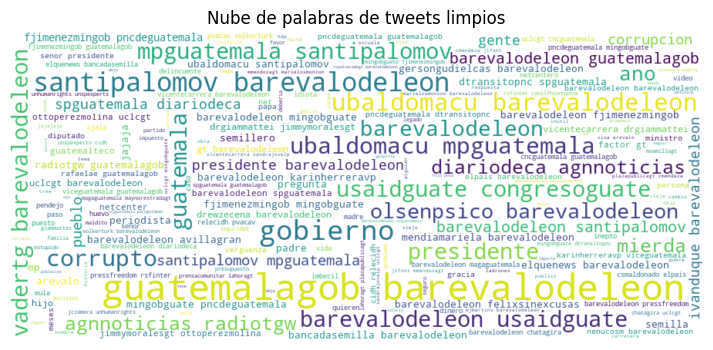

In [177]:
text_for_wc = ' '.join(df['tweet_text_clean'].tolist())
wc = WordCloud(width=900, height=400, background_color='white').generate(text_for_wc)
plt.figure(figsize=(10,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de tweets limpios')
plt.show()

In [178]:
# Diccionario de palabras y frecuencias relativas
frecuencias = wc.words_
print(type(frecuencias))
print(list(frecuencias.items())[:10])

<class 'dict'>
[('guatemalagob barevalodeleon', 1.0), ('gobierno', 0.5202492211838006), ('santipalomov barevalodeleon', 0.4750778816199377), ('ubaldomacu barevalodeleon', 0.38317757009345793), ('ubaldomacu mpguatemala', 0.367601246105919), ('corrupto', 0.3582554517133956), ('vadertg barevalodeleon', 0.3442367601246106), ('mpguatemala santipalomov', 0.338006230529595), ('guatemala', 0.3317757009345794), ('barevalodeleon usaidguate', 0.32398753894080995)]


In [179]:
# Ejemplo: actividad por hora
activity = (
    df.dropna(subset=['date'])
      .assign(hour=lambda d: d['date'].dt.hour)
      .groupby('hour')['id_str']
      .count()
      .reset_index(name='tweets')
)
activity

,hour,tweets
0,0,301
1,1,261
2,2,226
3,3,186
4,4,165
5,5,143
6,6,89
7,7,33
8,8,17
9,9,13


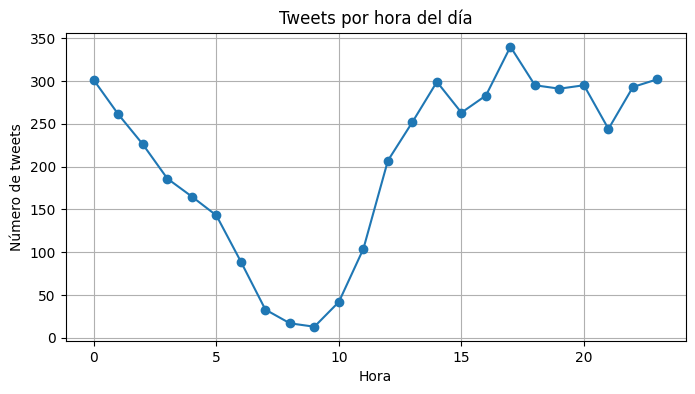

In [180]:
plt.figure(figsize=(8,4))
plt.plot(activity['hour'], activity['tweets'], marker='o')
plt.title('Tweets por hora del día')
plt.xlabel('Hora')
plt.ylabel('Número de tweets')
plt.grid(True)
plt.show()

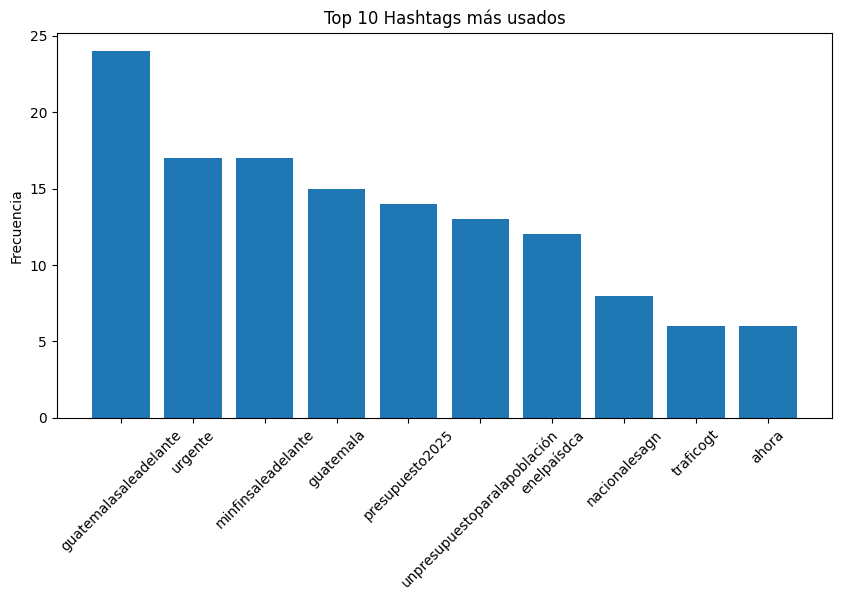

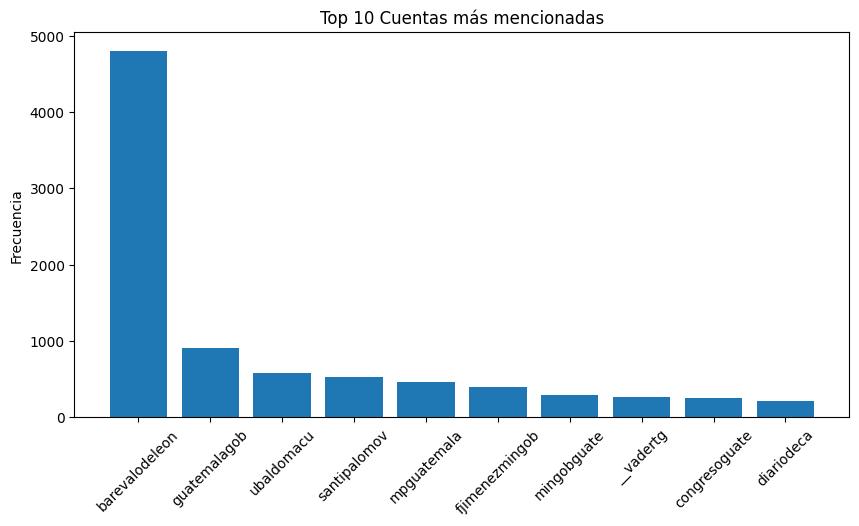

In [ ]:

# --- Hashtags ---
top_hashtags = Counter(all_hashtags).most_common(10)
df_hashtags = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Frecuencia'])

plt.figure(figsize=(10,5))
plt.bar(df_hashtags['Hashtag'], df_hashtags['Frecuencia'])
plt.title("Top 10 Hashtags más usados")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.show()

# --- Menciones ---
top_mentions = Counter([m for ms in df['mentionedUsers'] for m in ms]).most_common(10)
df_mentions = pd.DataFrame(top_mentions, columns=['Usuario', 'Frecuencia'])

plt.figure(figsize=(10,5))
plt.bar(df_mentions['Usuario'], df_mentions['Frecuencia'])
plt.title("Top 10 Cuentas más mencionadas")
plt.xticks(rotation=45)
plt.ylabel("Frecuencia")
plt.show()
